# Random Forest

# Importing modules

In [19]:
from sklearn.datasets import load_iris

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating Dataset

In [20]:
dataset = load_iris()

In [21]:
X = dataset.data
y = dataset.target

In [22]:
print(X.shape, y.shape)

(150, 4) (150,)


In [23]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [24]:
y[:5]

array([0, 0, 0, 0, 0])

In [25]:
X = (X - X.min()) / (X.max() - X.min())

In [26]:
X[:5]

array([[0.64102564, 0.43589744, 0.16666667, 0.01282051],
       [0.61538462, 0.37179487, 0.16666667, 0.01282051],
       [0.58974359, 0.3974359 , 0.15384615, 0.01282051],
       [0.57692308, 0.38461538, 0.17948718, 0.01282051],
       [0.62820513, 0.44871795, 0.16666667, 0.01282051]])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
df = pd.DataFrame(X, columns=dataset.feature_names)

In [29]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.641026,0.435897,0.166667,0.012821
1,0.615385,0.371795,0.166667,0.012821
2,0.589744,0.397436,0.153846,0.012821
3,0.576923,0.384615,0.179487,0.012821
4,0.628205,0.448718,0.166667,0.012821


In [30]:
df['target'] = y
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.641026,0.435897,0.166667,0.012821,0
1,0.615385,0.371795,0.166667,0.012821,0
2,0.589744,0.397436,0.153846,0.012821,0
3,0.576923,0.384615,0.179487,0.012821,0
4,0.628205,0.448718,0.166667,0.012821,0


# Model

In [31]:
model = RandomForestClassifier(
    n_estimators=4,
    random_state=57
)

In [32]:
model

RandomForestClassifier(n_estimators=4, random_state=57)

In [33]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4, random_state=57)

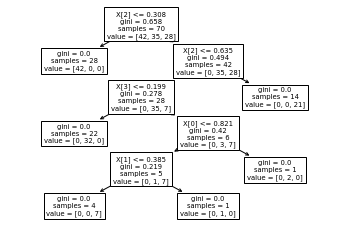

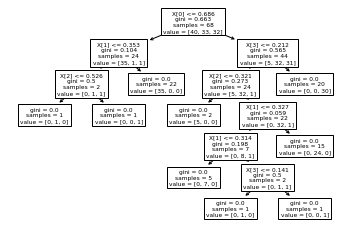

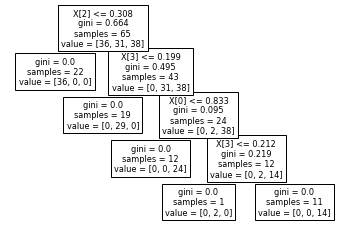

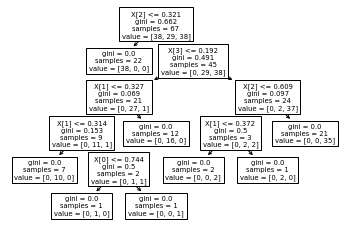

In [36]:
for i in range(0, model.n_estimators):
    plot_tree(model.estimators_[i])
    plt.show()

# Evaluation

In [37]:
model.score(X_test, y_test)

0.9333333333333333

In [39]:
cls = model.predict([X_test[24], X_test[7], X_test[3], X_test[25]])

In [40]:
cls

array([2, 1, 1, 2])

In [41]:
[dataset.target_names[i] for i in cls]

['virginica', 'versicolor', 'versicolor', 'virginica']

In [42]:
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 0, 1, 1, 1])

In [43]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 14,  0],
       [ 0,  3, 15]], dtype=int64)

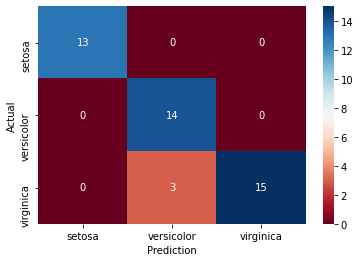

In [49]:
sns.heatmap(cm,
            cmap='RdBu',
            annot=True,
            fmt='.0f',
            xticklabels=dataset.target_names,
            yticklabels=dataset.target_names
           )
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()